In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SMH.zip to SMH.zip


In [ ]:
!unzip SMH.zip

Archive:  SMH.zip
  inflating: Student Mental health.csv  


In [ ]:
df = pd.read_csv('Student Mental health.csv')

In [ ]:
df.head()

,Timestamp,gender,Age,major,year,CGPA,Marital status,depression,anxiety,panic,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,"[3.00, -, 3.49]",No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,"[3.00, -, 3.49]",No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,"[3.00, -, 3.49]",No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,"[3.00, -, 3.49]",Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,"[3.00, -, 3.49]",No,No,No,No,No


In [ ]:
df['gender_encoded'] = df['gender'].map({'Male': 0, 'Female': 1})

In [ ]:
df['Marital status encoded'] = df['Marital status'].map({'Yes': 1, 'No': 0})

In [ ]:
df['depression_encoded'] = df['depression'].map({'Yes': 1, 'No': 0})

In [ ]:
df['anxiety_encoded'] = df['anxiety'].map({'Yes': 1, 'No': 0})

In [ ]:
df['panic_encoded'] = df['panic'].map({'Yes': 1, 'No': 0})

In [ ]:
df['treatment_encoded'] = df['treatment'].map({'Yes': 1, 'No': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
df_copy = df.copy()

In [ ]:

df = df.rename(columns={'Choose your gender': 'gender', 'What is your course?' : 'major',})

In [ ]:
df = df.rename(columns={'GPA': 'CGPA'})

In [ ]:
df = df.rename(columns={'Do you have Depression?': 'depression', 'Do you have Anxiety?' : 'anxiety',})

In [ ]:
df = df.rename(columns={'Do you have Panic attack?': 'panic', 'Did you seek any specialist for a treatment?' : 'treatment',})

# 🌟 Exercise 1 : Visualizing the Distribution of CGPA

Objective:
Create a histogram to visualize the distribution of students’ CGPA.

Dataset Overview: The CGPA of students is categorized into different ranges. This exercise will help us understand the overall academic performance distribution among the students.

Tasks:

Import necessary libraries.
Load the dataset into a pandas DataFrame. (For the purpose of this exercise, let’s assume the DataFrame is already loaded and named df).

Use Seaborn’s histplot to create a histogram of the CGPA categories.

Customize the histogram with an appropriate color and add a title.
Display the plot.

In [ ]:
df['CGPA'].unique()

array(['3.00 -3.49', '3.50 -4.00', '2.50 -2.99', '2.00 -2.49', '0 -1.99'],
      dtype=object)

In [ ]:
df["CGPA"] = df["CGPA"].apply(lambda x: " ".join(x))  # Преобразуем список в строку
df["CGPA"] = df["CGPA"].str.replace(" - ", " -")

In [ ]:
df['CGPA'] = df['CGPA'].replace

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": "#f0f0f0"})

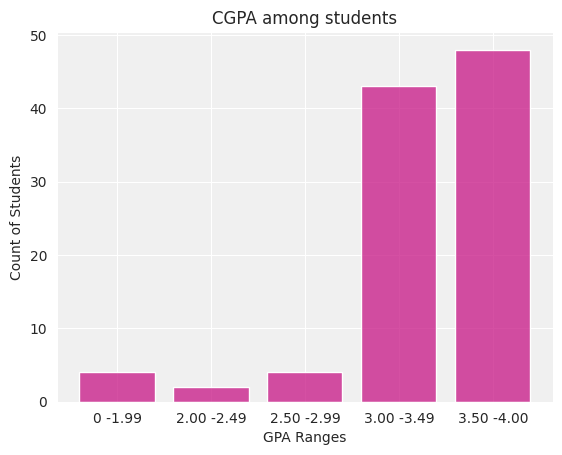

In [ ]:
ordered_ranges = ["0 -1.99", "2.00 -2.49", "2.50 -2.99", "3.00 -3.49", "3.50 -4.00"]
df["CGPA"] = pd.Categorical(df["CGPA"], categories=ordered_ranges, ordered=True)
sns.histplot(df['CGPA'], color='#C71585', shrink=0.8)

plt.xlabel('GPA Ranges')
plt.ylabel('Count of Students')
plt.title('CGPA among students')
plt.show()

# 🌟 Exercise 2: Comparing Anxiety Levels Across Different Genders

Objective:
Use a bar plot to compare the proportion of students experiencing anxiety across different genders.

Dataset Overview: The dataset includes a ‘Do you have Anxiety?’ column with responses and a ‘Choose your gender’ column.

Tasks:

Import necessary libraries.

Assuming the dataset is loaded into df, create a bar plot using Seaborn to compare anxiety levels across genders.

Customize your plot with an appropriate color palette.
Add a title to your plot.

Display the plot.

In [ ]:
proportions = df.groupby('gender')['anxiety_encoded'].mean().reset_index()

In [ ]:
proportions.head()

,gender,anxiety_encoded
0,Female,0.320000
1,Male,0.384615


In [ ]:
proportions.rename(columns={'anxiety_encoded': 'anxiety_proportion'}, inplace=True)

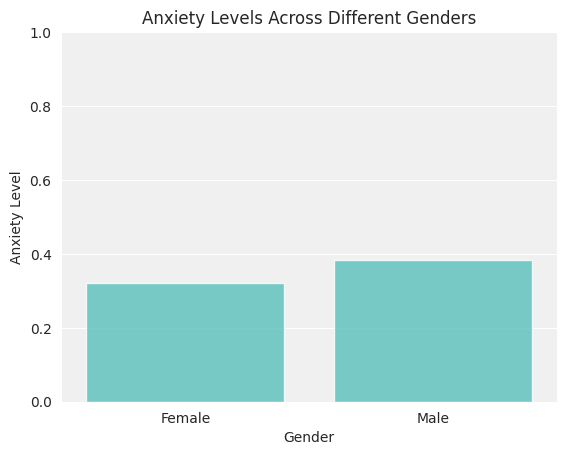

In [ ]:
sns.barplot(x=df['gender'],y = proportions['anxiety_proportion'], color = '#48D1CC', alpha=0.8)
plt.ylim(0, 1)
plt.title('Anxiety Levels Across Different Genders')
plt.xlabel('Gender')
plt.ylabel('Anxiety Level')
plt.show()

In [109]:
df.head()

,Timestamp,gender,Age,major,year,CGPA,Marital status,depression,anxiety,panic,treatment,gender_encoded,Marital status encoded,depression_encoded,anxiety_encoded,panic_encoded,treatment_encoded
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.245,No,Yes,No,Yes,No,1,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.245,No,No,Yes,No,No,0,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.245,No,Yes,Yes,Yes,No,0,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.245,Yes,Yes,No,No,No,1,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.245,No,No,No,No,No,0,0,0,0,0,0


# 🌟 Exercise 3: Exploring the Relationship Between Age and Panic Attacks


Objective:

Create a scatter plot to explore if there’s any visible relationship between students’ age and the occurrence of panic attacks.

Dataset Overview: The dataset records students’ ages and their responses to whether they have experienced panic attacks.

Tasks:

Import necessary libraries.

Use Seaborn’s scatterplot to create a scatter plot with age on the x-axis and the occurrence of panic attacks on the y-axis. For simplicity, convert panic attack responses to numeric (e.g., Yes=1, No=0).

Customize the scatter plot to improve readability.
Add a title.
Display the plot.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Timestamp               101 non-null    object  
 1   gender                  101 non-null    object  
 2   Age                     100 non-null    float64 
 3   major                   101 non-null    object  
 4   year                    101 non-null    object  
 5   CGPA                    101 non-null    category
 6   Marital status          101 non-null    object  
 7   depression              101 non-null    object  
 8   anxiety                 101 non-null    object  
 9   panic                   101 non-null    object  
 10  treatment               101 non-null    object  
 11  gender_encoded          101 non-null    int64   
 12  Marital status encoded  101 non-null    int64   
 13  depression_encoded      101 non-null    int64   
 14  anxiety_encoded         10

In [100]:
panic_counts.head(10)

,Age,panic_encoded
0,18.0,9
1,19.0,9
2,20.0,1
3,21.0,0
4,22.0,0
5,23.0,5
6,24.0,9


<function matplotlib.pyplot.show(close=None, block=None)>

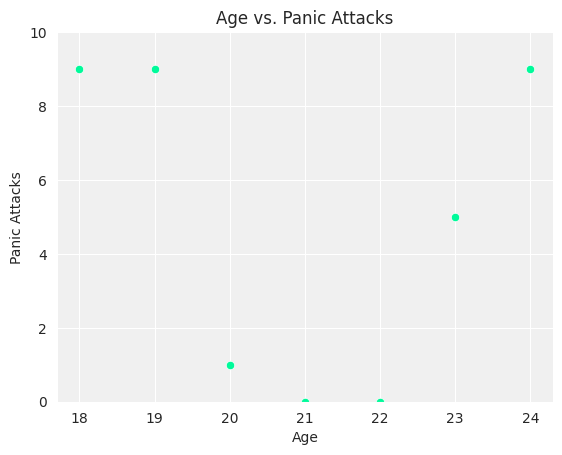

In [87]:

sns.scatterplot(data=panic_counts, x='Age',y='panic_encoded', color='#00FA9A', alpha=1)
plt.title('Age vs. Panic Attacks')
plt.ylim(0, 10)
plt.xlabel('Age')
plt.ylabel('Panic Attacks')
plt.show

# 🌟 Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair

Objective:

Utilize Seaborn’s pairplot function to visualize the pairwise relationships and distributions across multiple variables in the dataset.

Scenario: You’re interested in understanding the relationships between students’ ages, CGPAs, and their mental health status regarding depression, anxiety, and panic attacks.

Tasks:

Select a subset of columns relevant to the exercise: Age, CGPA, Depression, Anxiety, and Panic attacks. Assume these columns are appropriately coded as numerical values for simplicity.
Use Seaborn’s pairplot to visualize pairwise relationships and distributions.
Customize the plot with a hue based on one of the mental health conditions to differentiate the data points.


In [144]:
panic_counts = df.groupby('Age')['panic_encoded'].sum().reset_index()

In [145]:
anxiety_counts = df.groupby('Age')['anxiety_encoded'].sum().reset_index()

In [146]:
depression_counts = df.groupby('Age')['depression_encoded'].sum().reset_index()

In [147]:
cgpa_mean = df.groupby('Age')['CGPA'].mean().reset_index()

In [148]:
panic_counts['Age'] = panic_counts['Age'].astype(int)
anxiety_counts['Age'] = anxiety_counts['Age'].astype(int)
depression_counts['Age'] = depression_counts['Age'].astype(int)
cgpa_mean['Age'] = cgpa_mean['Age'].astype(int)

In [149]:
def convert_cgpa(cgpa):
  spliting = cgpa.split('-')
  return (float(spliting[0]) + float(spliting[1]))/2
df['CGPA'] = df['CGPA'].apply(convert_cgpa)

AttributeError: 'float' object has no attribute 'split'

In [ ]:
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')

In [ ]:
print(panic_counts['Age'].dtype)
print(anxiety_counts['Age'].dtype)
print(depression_counts['Age'].dtype)
print(cgpa_mean['Age'].dtype)

In [ ]:
df_agregation = pd.merge(panic_counts, anxiety_counts, on='Age')

In [ ]:
df_agregation = pd.merge(df_agregation, depression_counts, on='Age')

In [ ]:
df_agregation = pd.merge(df_agregation, cgpa_mean, on='Age')

In [ ]:
df_agregation.head()

In [151]:
df_agregation.rename(columns={'panic_encoded': 'panic count', 'anxiety_encoded': 'anxiety count', 'depression_encoded': 'depression count'}, inplace=True)

In [ ]:
df_agregation['CGPA'] = df_agregation['CGPA'].round(2)

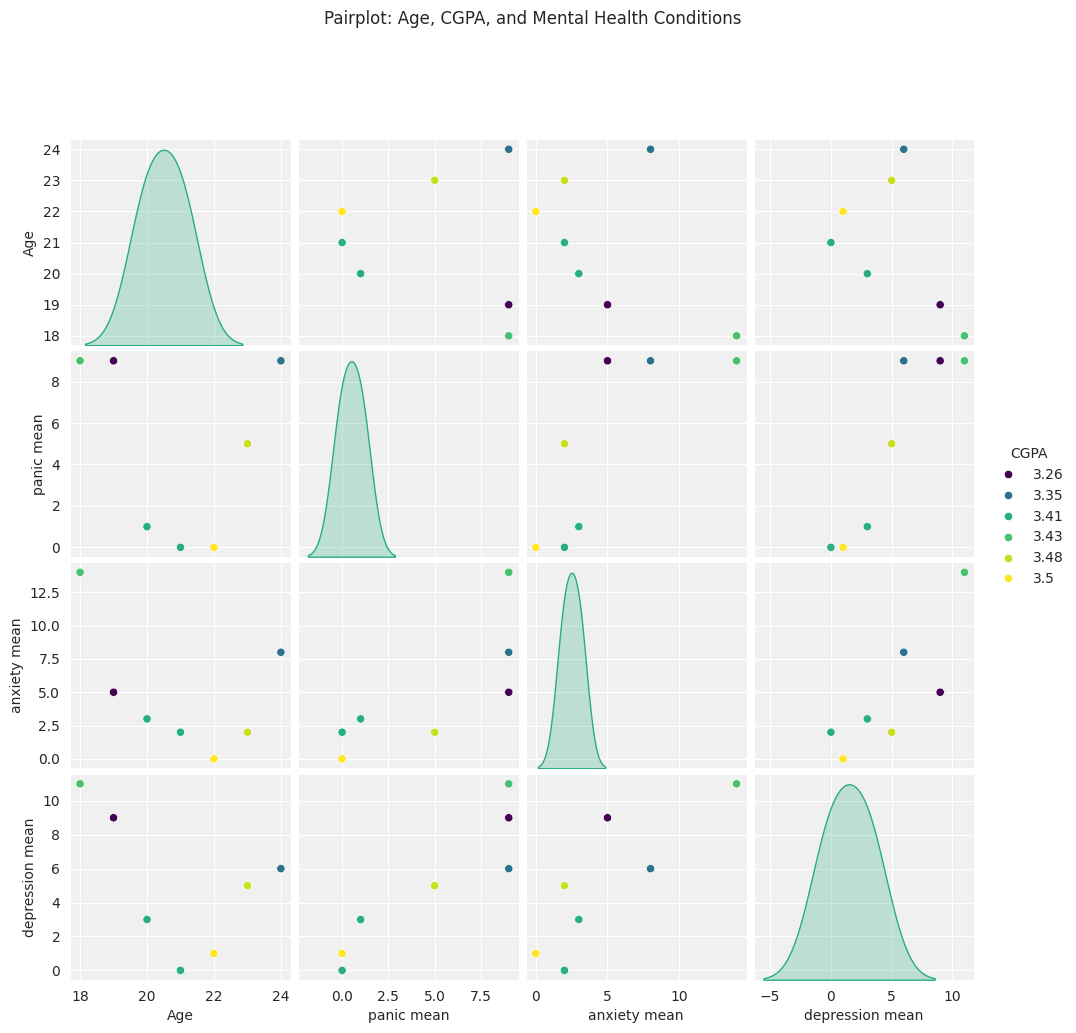

In [150]:
sns.pairplot(data = df_agregation,hue = 'CGPA', diag_kind='kde', palette='viridis', height=2.5)
plt.subplots_adjust(top=0.9)
plt.suptitle('Pairplot: Age, CGPA, and Mental Health Conditions', y=1.03)

plt.show()

# 🌟 Exercise 5: Creating a Heatmap to Visualize Correlations

Objective:
Use Seaborn to create a heatmap that visualizes the correlation matrix of students’ age, CGPA, and mental health status indicators.

Scenario: You aim to identify any potential correlations between students’ age, CGPA, and their self-reported status on depression, anxiety, and panic attacks to find patterns that might need further investigation.

Tasks:

Calculate the correlation matrix for the selected subset of your dataset.
Use Seaborn’s heatmap function to visualize the correlation matrix.
Customize the heatmap for better readability (e.g., annotating the correlation coefficients).

In [138]:
df_corr = cgpa_mean

In [139]:
df_corr = df_corr.merge(depression_counts, on='Age')

In [140]:
df_corr.head()

,Age,CGPA,depression_encoded
0,18,3.427500,11
1,19,3.258571,9
2,20,3.413333,3
3,21,3.413333,0
4,22,3.497500,1


In [153]:
correlation_matrix = df[['Age', 'CGPA', 'depression_encoded']].corr()
correlation_matrix

,Age,CGPA,depression_encoded
Age,1.000000,0.005696,-0.072171
CGPA,0.005696,1.000000,0.040662
depression_encoded,-0.072171,0.040662,1.000000


In [156]:
correlation_matrix = correlation_matrix.rename(columns={'depression_encoded': 'depression'})

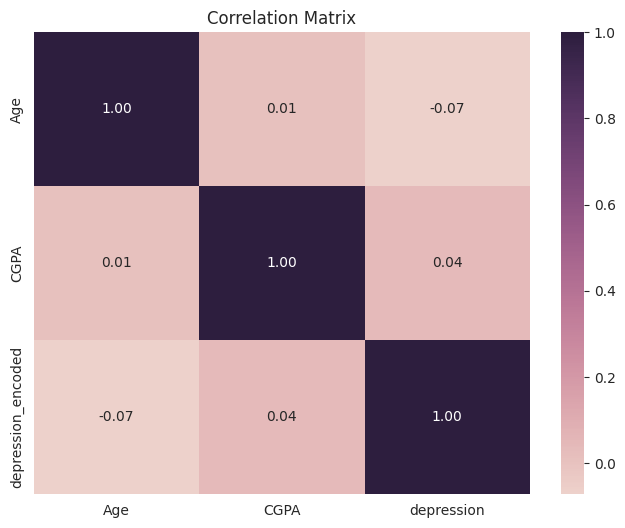

In [158]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 🌟 Exercise 6: Analyzing Distributions and Relationships Using FacetGrid


Objective:
Explore the distribution of CGPA across different levels of depression status using Seaborn’s FacetGrid.

Scenario: You are interested in exploring how students’ CGPA distributions vary among those who have reported depression versus those who haven’t.

Tasks:

Use Seaborn’s FacetGrid to create a grid of histograms for CGPA, segmented by depression status.
Map a histogram plot to each facet with appropriate customizations.
Add titles and labels for clarity.

In [160]:
df_relation = df.groupby('depression_encoded')['CGPA'].mean().reset_index()

In [165]:
df_relation.head()

,depression,CGPA
0,0,3.336818
1,1,3.386571


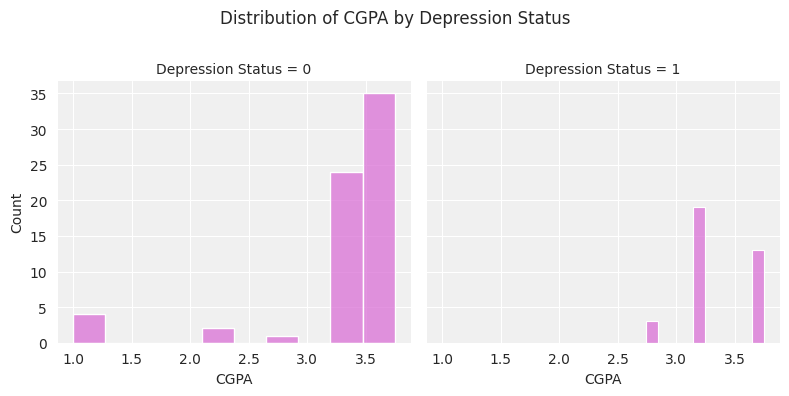

In [177]:
g = sns.FacetGrid(df, col="depression_encoded", height=4, aspect=1, col_order=[0, 1])
g.map(sns.histplot, "CGPA", kde=False, bins=10, color="#DA70D6")

g.set_axis_labels("CGPA", "Count")
g.set_titles("Depression Status = {col_name}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Distribution of CGPA by Depression Status")

plt.show()